The confusion matrix is 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

 The accuracy is  0.22164412070759626


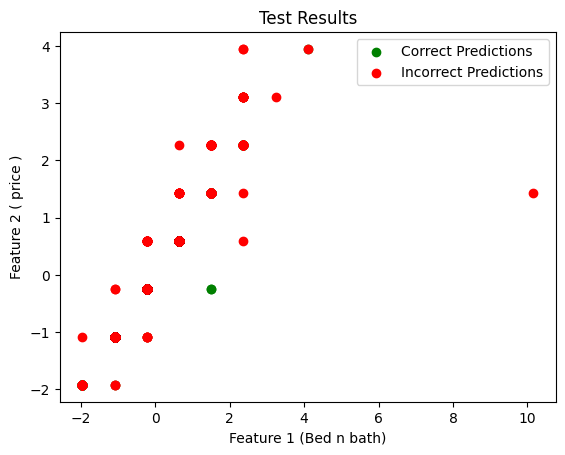

In [ ]:
# SVM algorithm using classification
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

dataset = pd.read_csv('/content/graana.csv')

# Drop samples with missing values
dataset.dropna(inplace=True)

X = dataset.iloc[:, [9, 10]].values
y = dataset.iloc[:, 4].values

# Label Encoding for y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print('The confusion matrix is \n' ,cm)
# The classfiication algorithm allows for accuracy score while regreession types use mean squared error and R-squared score for better evaluation
accuracy = accuracy_score(y_test, y_pred)
print('\n The accuracy is ',accuracy)

# furthermore to predict price instead of performing classification, a regression algorithm of SVM can be used.

# Visualize the test results
correct_predictions = (y_test == y_pred)
incorrect_predictions = (y_test != y_pred)

plt.scatter(X_test[correct_predictions, 0], X_test[correct_predictions, 1], c='g', label='Correct Predictions')
plt.scatter(X_test[incorrect_predictions, 0], X_test[incorrect_predictions, 1], c='r', label='Incorrect Predictions')
plt.xlabel('Feature 1 (Bed n bath)')
plt.ylabel('Feature 2 ( price )')
plt.title('Test Results')
plt.legend()
plt.show()

